# Despliege de modelos.

In [43]:
import numpy as np
import pandas as pd

import sagemaker

role = sagemaker.get_execution_role()
sess = sagemaker.Session()
region = sess.boto_region_name
bucket = sess.default_bucket()
prefix = 'module_5/part_1'

### Preparación de los datos

- Usaremos la base de datos de bajas de clientes usada anteriormente.

In [8]:
source_file = 's3://sagemaker-sample-files/datasets/tabular/synthetic/churn.txt'
local_prefix = 'data/churn_data'
os.makedirs(local_prefix, exist_ok=True)
sagemaker.s3.S3Downloader.download(source_file, local_prefix)

In [44]:
df = pd.read_csv(f'./{local_prefix}/churn.txt')
df['CustomerID'] = df.index
df

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,CustomerID
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.,0
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.,1
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.,2
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.,3
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NH,4,787,151-3162,yes,yes,800,10.862632,5,7.250969,...,8.026482,4.921314,350,6.748489,4.872570,8,2.122530,9,False.,4995
4996,SD,140,836,351-5993,no,no,0,1.581127,8,3.758307,...,1.328827,0.939932,300,4.522661,6.938571,2,4.600473,4,False.,4996
4997,SC,32,836,370-3127,no,yes,700,0.163836,5,4.243980,...,2.340554,0.939469,450,5.157898,4.388328,7,1.060340,6,False.,4997
4998,MA,142,776,604-2108,yes,yes,600,2.034454,5,3.014859,...,3.470372,6.076043,150,4.362780,7.173376,3,4.871900,7,True.,4998


In [10]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?', 'CustomerID'],
      dtype='object')

In [11]:
df[["Int'l Plan", "VMail Plan"]] = df[["Int'l Plan", "VMail Plan"]].replace(to_replace=['yes', 'no'], value=[1, 0])

In [12]:
df['Churn?'] = df['Churn?'].replace(to_replace=['True.', 'False.'], value=[1, 0])

In [15]:
columns=[
    'Churn?', 'Account Length', "Int'l Plan",
    'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
    'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
    'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
    'CustServ Calls'
]
df.index = df['CustomerID']
df_processed = df[columns]

In [16]:
df_processed.head()

,Churn?,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
CustomerID,,,,,,,,,,,,,,,,,,
0,1,163,0,1,300,8.162204,3,7.579174,3.933035,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3
1,0,15,1,0,0,10.018993,4,4.226289,2.325005,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8
2,0,131,0,1,300,4.708490,3,4.768160,4.537466,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4
3,0,75,1,1,700,1.268734,3,2.567642,2.528748,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6
4,1,146,1,0,0,2.696177,3,5.908916,6.015337,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6


In [17]:
from sklearn.model_selection import train_test_split

In [22]:
df_train, df_test = train_test_split(
    df_processed, 
    test_size=0.1,
    random_state=42, 
    shuffle=True,
)

In [23]:
df_train

,Churn?,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
CustomerID,,,,,,,,,,,,,,,,,,
3716,1,199,0,0,0,1.888657,5,3.292043,2.078057,6,2.012784,6.185571,150,6.232641,3.643885,4,0.250856,7
3779,1,150,0,1,300,9.116997,5,7.604945,5.869767,5,5.261558,3.979898,150,6.780750,5.865937,8,1.506096,6
135,1,168,0,1,100,10.986139,3,7.844371,6.033296,3,6.384150,3.019162,200,8.379480,6.477625,8,0.084284,6
4480,1,53,1,1,700,1.202977,2,1.210471,4.385186,4,3.430470,1.381722,200,6.869588,3.535553,5,1.077305,11
1437,0,6,1,1,700,3.944982,6,2.879737,2.831342,7,2.000613,1.679486,450,1.281451,4.429052,7,3.025466,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,96,0,0,0,0.068791,1,2.477621,0.019345,6,3.166656,7.200174,300,2.572314,5.936378,5,2.879934,4
466,0,41,1,0,0,4.606600,3,2.533723,4.277873,3,6.393649,3.326675,300,4.477047,5.783281,9,1.947355,9
3092,1,42,0,0,0,7.114836,4,6.905721,5.795053,4,5.577240,5.400889,100,3.487983,5.539009,6,7.922374,3


In [24]:
df_train.to_csv('train.csv', index=False, header=False)
df_test.to_csv('test.csv', index=False, header=False)

In [25]:
sess.upload_data(path='train.csv', bucket=bucket, key_prefix=f'{prefix}/data')

's3://sagemaker-eu-west-1-467432373215/module_5/part_1/data/train.csv'

In [26]:
sess.upload_data(path='test.csv', bucket=bucket, key_prefix=f'{prefix}/data')

's3://sagemaker-eu-west-1-467432373215/module_5/part_1/data/test.csv'

### Entrenamiento del modelo de clasificación

In [28]:
image = sagemaker.image_uris.retrieve(region=region, framework='xgboost', version='1.3-1')
image

'141502667606.dkr.ecr.eu-west-1.amazonaws.com/sagemaker-xgboost:1.3-1'

In [30]:
train_data_s3 = f's3://{bucket}/{prefix}/data/train.csv'
val_data_s3 = f's3://{bucket}/{prefix}/data/test.csv'

train_input = sagemaker.inputs.TrainingInput(s3_data=train_data_s3, 
                                             content_type='csv')
val_input = sagemaker.inputs.TrainingInput(s3_data=val_data_s3, 
                                           content_type='csv')

data_channels = {
    'train': train_input,
    'validation': val_input,
}


In [31]:
s3_output = f's3://{bucket}/{prefix}/{local_prefix}/training'

In [47]:
estimator = sagemaker.estimator.Estimator(
    image,
    role,
    instance_count=1,
    instance_type='ml.m5.xlarge',
    output_path=s3_output,
    enable_sagemaker_metrics=True,
    sagemaker_session=sess
)

estimator.set_hyperparameters(objective='binary:logistic', num_round=20)

In [49]:
jobname = 'xgboost-model-deploy-2'
estimator.fit(
    inputs=data_channels,
    job_name=jobname, 
)

2022-12-13 20:57:10 Starting - Starting the training job...ProfilerReport-1670965030: InProgress
......
2022-12-13 20:58:35 Starting - Preparing the instances for training.........
2022-12-13 21:00:11 Downloading - Downloading input data
2022-12-13 21:00:11 Training - Training image download completed. Training in progress.
2022-12-13 21:00:11 Uploading - Uploading generated training model[2022-12-13 21:00:03.253 ip-10-0-64-43.eu-west-1.compute.internal:8 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-12-13:21:00:03:INFO] Imported framework sagemaker_xgboost_container.training
[2022-12-13:21:00:03:INFO] Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
[2022-12-13:21:00:03:INFO] No GPUs detected (normal if no gpus installed)
[2022-12-13:21:00:03:INFO] Running XGBoost Sagemaker in algorithm mode
[2022-12-13:21:00:03:INFO] Determined delimiter of CSV input is ','
[2022-12-13:21:00:03:INFO] Determined delimiter of CSV input is 

## Inferencia
- Después de crear y entrenar los modelos, se pueden obtener predicciones de una de las dos formas siguientes:
    - Obtener predicciones para un conjunto de datos completo, con sagemaker Batch Trasform.
    - Configurar un punto de enlace persistente para obtener predicciones de sus modelos, serverless o con máquina asociada.

### Batch Transform


<center>
<img src="./imgs/batch trasform.png"  alt="drawing" width="800"/>
</center>

- Necesitamos generar un csv solo con los datos de test sin la etiqueta.


In [55]:
df_test.iloc[:, 1:].to_csv('test_no_label.csv', index=False, header=False)

In [58]:
test_data_s3 = sess.upload_data(path='test_no_label.csv', bucket=bucket, key_prefix=f'{prefix}/data')
test_data_s3

's3://sagemaker-eu-west-1-467432373215/module_5/part_1/data/test_no_label.csv'

In [59]:
jobname = f'churn-tf-bt'

s3_output_location = f's3://{bucket}/{prefix}/{jobname}'

transformer = estimator.transformer(instance_count=1, 
                                    instance_type='ml.c5.xlarge',
                                    max_payload = 2, # MB
                                    accept = 'application/jsonlines',
                                    output_path = s3_output_location,
                                    assemble_with = 'Line')

transformer.transform(test_data_s3, 
                      content_type='text/csv', 
                      split_type = 'Line', 
                      job_name = jobname)

print('Waiting for transform job: ' + transformer.latest_transform_job.job_name)

..........................[2022-12-13:21:09:09:INFO] No GPUs detected (normal if no gpus installed)
[2022-12-13:21:09:09:INFO] No GPUs detected (normal if no gpus installed)
[2022-12-13:21:09:09:INFO] nginx config: 
worker_processes auto;
daemon off;
pid /tmp/nginx.pid;
error_log  /dev/stderr;
worker_rlimit_nofile 4096;
events {
  worker_connections 2048;
}
http {
  include /etc/nginx/mime.types;
  default_type application/octet-stream;
  access_log /dev/stdout combined;
  upstream gunicorn {
    server unix:/tmp/gunicorn.sock;
  }
  server {
    listen 8080 deferred;
    client_max_body_size 0;
    keepalive_timeout 3;
    location ~ ^/(ping|invocations|execution-parameters) {
      proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
      proxy_set_header Host $http_host;
      proxy_redirect off;
      proxy_read_timeout 60s;
      proxy_pass http://gunicorn;
    }
    location / {
      return 404 "{}";
    }
  }
}
[2022-12-13 21:09:09 +0000] [20] [INFO] Starting gunicorn 

In [60]:
output = transformer.output_path

In [61]:
output

's3://sagemaker-eu-west-1-467432373215/module_5/part_1/churn-tf-bt'

In [62]:
output_prefix = 'data/test_output'
!mkdir -p {output_prefix}
!aws s3 cp --recursive {output} {output_prefix}

download: s3://sagemaker-eu-west-1-467432373215/module_5/part_1/churn-tf-bt/test_no_label.csv.out to data/test_output/test_no_label.csv.out
head: cannot open '{output_prefix}/{csv_test_filename}.out' for reading: No such file or directory


In [70]:
y_pred_prob = pd.read_csv('data/test_output/test_no_label.csv.out', header=None)
y_pred_prob

,0
0,0.008796
1,0.162950
2,0.398571
3,0.011076
4,0.712775
...,...
495,0.986856
496,0.160130
497,0.991364
498,0.984184


- Obtengamos algunas métricas del conjunto de test.

In [74]:
y_pred_prob = y_pred_prob.iloc[:, 0].to_numpy()

In [75]:
y_test = df_test.loc[:, 'Churn?'].to_numpy()

In [82]:
y_pred  = np.where(y_pred_prob > 0.5, 1, 0)

In [83]:
print(y_test.shape, y_pred.shape, y_pred_prob.shape)

(500,) (500,) (500,)


In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       262
           1       0.93      0.93      0.93       238

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



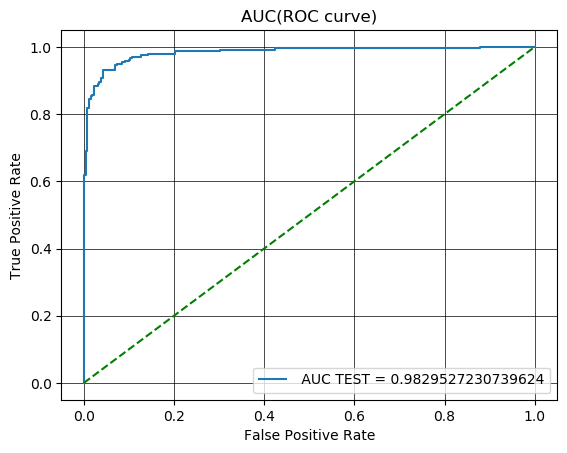

In [90]:
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_pred_prob)
auc_value = auc(test_fpr, test_tpr)

plt.grid()
plt.plot(test_fpr, test_tpr, label=f" AUC TEST = {auc_value}")
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


### Despliege de endpoints en tiempo real

<center>
<img src="./imgs/endpoint_real.png"  alt="drawing" width="800"/>
</center>

### Despliege de un endpoint con máquina asociada

In [111]:
predictor = estimator.deploy(
    endpoint_name = 'churn-xgboost',              
    initial_instance_count=1, 
    instance_type='ml.c5.xlarge',
    serializer=sagemaker.serializers.CSVSerializer()
)

----!

In [112]:
data_test = df_test.iloc[-5:, 1:].values
data_test

array([[ 61.        ,   0.        ,   0.        ,   0.        ,
          8.88055545,   2.        ,   2.86331913,   8.47136902,
          3.        ,   8.12622886,   5.81757367, 200.        ,
          4.35226104,   3.33799017,   7.        ,   9.64054917,
          3.        ],
       [ 56.        ,   1.        ,   0.        ,   0.        ,
          8.16794993,   1.        ,   9.82144618,   5.75912238,
          9.        ,   3.86261278,   7.63103621, 200.        ,
          3.81983956,   5.34232159,   4.        ,   8.58216388,
          2.        ],
       [170.        ,   1.        ,   1.        , 100.        ,
         11.83583514,   3.        ,   9.53064195,   6.96701902,
          4.        ,   7.01659282,   3.31747015, 200.        ,
          7.57495071,   5.07060976,   7.        ,   3.012213  ,
          5.        ],
       [ 47.        ,   0.        ,   1.        , 300.        ,
         10.66066954,   4.        ,   5.79380199,   7.87464526,
          3.        ,   6.35007559,

In [113]:
prediction = predictor.predict(data_test)
print(prediction)

b'0.986855685710907\n0.1601303666830063\n0.9913638830184937\n0.984183669090271\n0.3341834247112274\n'


In [118]:
from io import StringIO

df=pd.read_csv(StringIO(str(prediction,'utf-8')) , header=None)
df

,0
0,0.986856
1,0.160130
2,0.991364
3,0.984184
4,0.334183


In [120]:
df_test.iloc[-5:, 0]

CustomerID
3928    1
544     0
367     1
1612    1
3550    1
Name: Churn?, dtype: int64

In [127]:
predictor.delete_endpoint()

ClientError: An error occurred (ValidationException) when calling the DeleteEndpointConfig operation: Could not find endpoint configuration "arn:aws:sagemaker:eu-west-1:467432373215:endpoint-config/churn-xgboost".

### Despliege de un endpoint serverless
- https://docs.aws.amazon.com/sagemaker/latest/dg/serverless-endpoints-create.html

In [122]:
from sagemaker.serverless import ServerlessInferenceConfig

In [123]:
serverless_config = ServerlessInferenceConfig(
    memory_size_in_mb=4096,
    max_concurrency=3,
)

In [124]:
predictor_serverless = estimator.deploy(
    endpoint_name='churn-xgboost-severless',
    serverless_inference_config=serverless_config
)

------!

In [ ]:
prediction = predictor.predict(data_test)
print(prediction)

In [ ]:
predictor.delete_endpoint()